In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

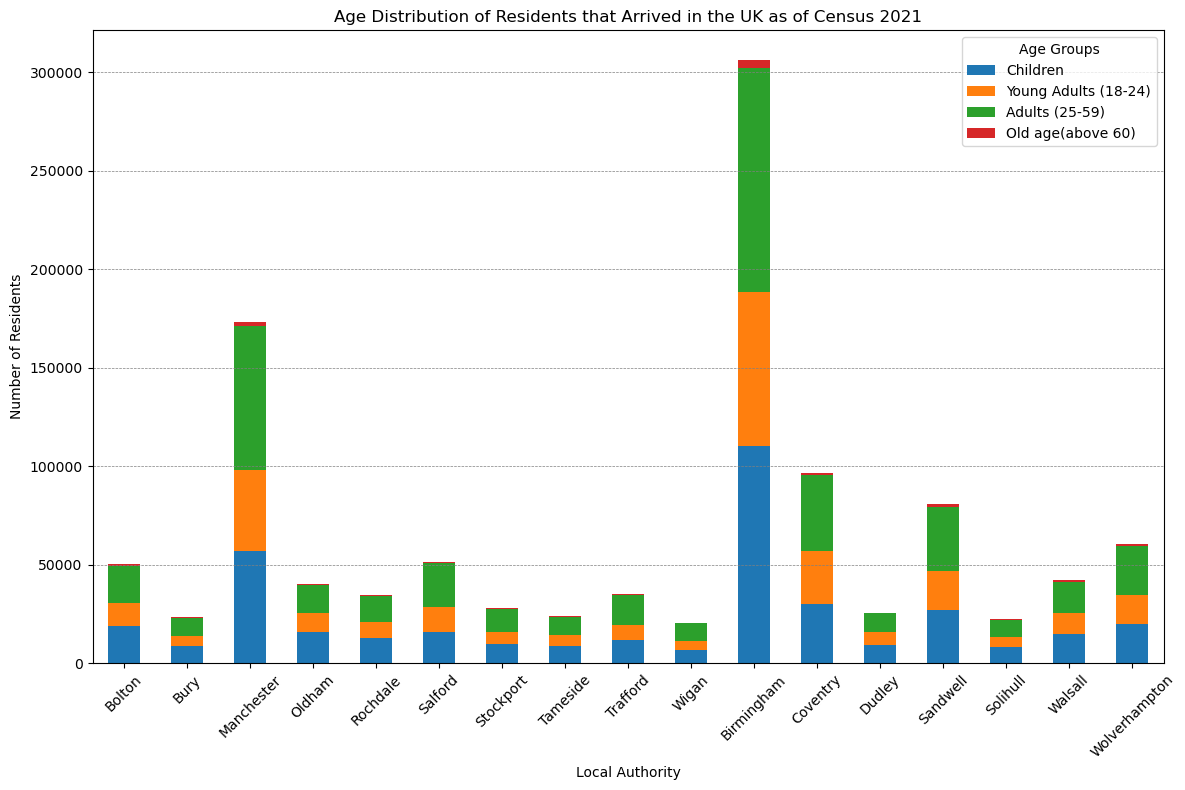

In [ ]:

# Loading data
age_data=pd.read_csv("\\Collective_Census_2021_folder_filtered-20240504T104643Z-001\\Collective_Census_2021_folder_filtered\\census2021-ts018\\census2021-ts018-ltla-filtered.csv")
age_data
# Strip unwanted text from the column names
age_data.columns = age_data.columns.str.replace('Arrived in the UK: ', '')
age_data.columns = age_data.columns.str.replace('Age of arrival in the UK: ', '')
age_data.columns = age_data.columns.str.replace('; measures: Value', '')

age_data_drop = age_data.drop(['geography code', 'Total: All usual residents', 'Arrived in the UK','Born in the UK','date'], axis=1)

# Define new age groups by summing appropriate columns
age_data_drop['Children'] = age_data_drop['Aged 0 to 4 years'] + age_data_drop['Aged 5 to 7 years'] + age_data_drop['Aged 8 to 9 years'] + age_data_drop['Aged 10 to 14 years'] + age_data_drop['Aged 15 years'] + age_data_drop['Aged 16 to 17 years']
age_data_drop['Young Adults (18-24)'] = age_data_drop['Aged 18 to 19 years'] + age_data_drop['Aged 20 to 24 years']
age_data_drop['Adults (25-59)'] = age_data_drop['Aged 25 to 29 years'] + age_data_drop['Aged 30 to 44 years'] + age_data_drop['Aged 45 to 59 years']
age_data_drop['Old age(above 60)'] = age_data_drop['Aged 60 to 64 years'] + age_data_drop['Aged 65 to 74 years'] + age_data_drop['Aged 75 to 84 years'] + age_data_drop['Aged 85 to 89 years']+ age_data_drop['Aged 90 years and over']


# Drop old age columns no longer needed
age_data_drop.drop(['Aged 0 to 4 years', 'Aged 5 to 7 years', 'Aged 8 to 9 years', 'Aged 10 to 14 years','Aged 15 years','Aged 16 to 17 years', 'Aged 18 to 19 years', 'Aged 20 to 24 years','Aged 25 to 29 years','Aged 30 to 44 years','Aged 45 to 59 years','Aged 60 to 64 years','Aged 65 to 74 years','Aged 75 to 84 years','Aged 85 to 89 years','Aged 90 years and over'], axis=1, inplace=True)

age_data_drop.set_index('geography', inplace=True)

# Plotting the stacked bar chart
ax = age_data_drop.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_title('Age Distribution of Residents that Arrived in the UK as of Census 2021')
ax.set_xlabel('Local Authority')
ax.set_ylabel('Number of Residents')
plt.xticks(rotation=45)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()





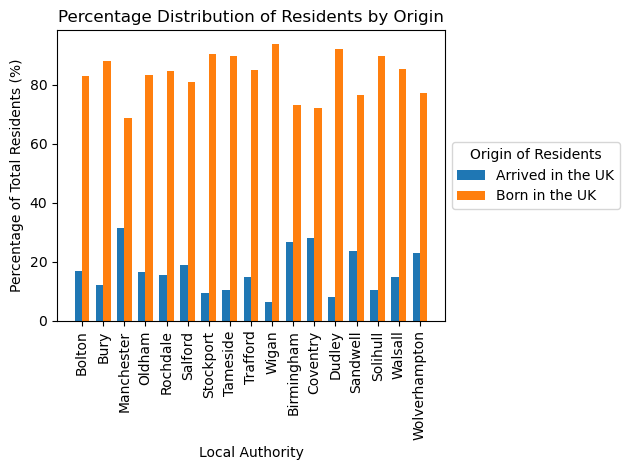

In [ ]:
# Calculating percentages
age_data['% Arrived in the UK'] = age_data['Arrived in the UK'] / age_data['Total: All usual residents'] * 100
age_data['% Born in the UK'] = age_data['Born in the UK'] / age_data['Total: All usual residents'] * 100

# Number of bars (categories) and number of groups (geographies)
n_groups = len(age_data)
n_bars = len(age_data.columns)
index = np.arange(n_groups)  # the label locations
bar_width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(index - bar_width/2, age_data['% Arrived in the UK'], bar_width, label='Arrived in the UK')
rects2 = ax.bar(index + bar_width/2, age_data['% Born in the UK'], bar_width, label='Born in the UK')

age_data.set_index('geography', inplace=True)

# Labels, title, and custom x-axis tick labels
ax.set_xlabel('Local Authority')
ax.set_ylabel('Percentage of Total Residents (%)')
ax.set_title('Percentage Distribution of Residents by Origin')
ax.set_xticks(index)
ax.set_xticklabels(age_data.index, rotation=90)
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Origin of Residents')
fig.tight_layout()
plt.show()

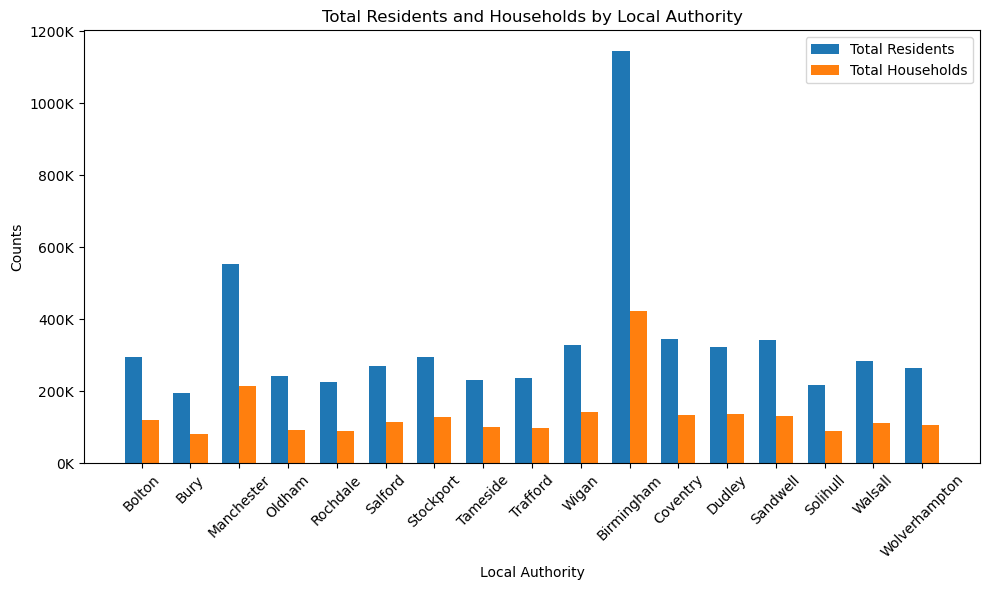

In [ ]:

# Loading resident dataset
df_resident_type = pd.read_csv("\\Collective_Census_2021_folder_filtered-20240504T104643Z-001\\Collective_Census_2021_folder_filtered\\census2021-ts001\\census2021-ts001-ltla-filtered.csv")
# Loading household dataset
df_household = pd.read_csv("\\Collective_Census_2021_folder_filtered-20240504T104643Z-001\\Collective_Census_2021_folder_filtered\\census2021-ts041\\census2021-ts041-ltla-filtered.csv")

# Strip unwanted text from the column names
df_resident_type.columns = df_resident_type.columns.str.replace('Residence type: ', '')
df_resident_type.columns = df_resident_type.columns.str.replace('; measures: Value', '')

# combining datasets
df_combined = pd.merge(df_resident_type, df_household, on='geography code')

from matplotlib.ticker import FuncFormatter
# Set the positions of the bars
bar_width = 0.35  # the width of the bars
index = range(len(df_combined['geography_x']))  # the label locations

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, df_combined['Total'], bar_width, label='Total Residents')
bar2 = ax.bar([p + bar_width for p in index], df_combined['Number of households: Number of households; measures: Value'], bar_width, label='Total Households')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Local Authority')
ax.set_ylabel('Counts')
ax.set_title('Total Residents and Households by Local Authority')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df_combined['geography_x'])
ax.legend()

# Define a custom formatter
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Rotate tick labels for better visibility if needed
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()